# Import Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import LabelEncoder
!pip install lightgbm
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')
!pip install xgboost
import xgboost as xgb

# Import Data
Load 2 data sets (train and test) in panda data frame

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Exploratory Data Analysis (General)
In order to have a basic understanding on 2 sets of data (train & test)

## Big Picture

In [3]:
# Basic info for 2 sets
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [4]:
df_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
df_test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [6]:
# Shape of 2 Data Sets
print(df_train.shape)
print(df_test.shape)

(3000, 23)
(4398, 22)


In [7]:
# There are 23 columns in train data while 22 columns in test data.
# It is becasue there is no revenue column in test data, this task require us to 
# use machine learning to calculate the revenue for test data.

In [8]:
df_train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [9]:
df_test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482242,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [10]:
# correlation between variables
df_train.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.019732,-0.007470,0.010750,0.000610
budget,0.019732,1.000000,0.342356,0.238373,0.752965
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460
runtime,0.010750,0.238373,0.133690,1.000000,0.216380
revenue,0.000610,0.752965,0.461460,0.216380,1.000000


<AxesSubplot:>

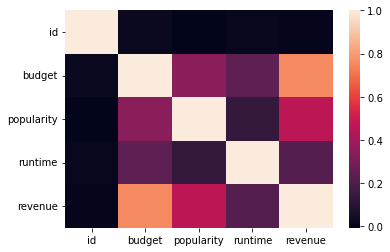

In [11]:
sns.heatmap(df_train.corr())

From the above heatmap and statistics, We can see that both budget and popularity have relatively large correlation with revenue and we will place more focus on them in the analysis part.

In [12]:
# Missing value in both sets
print("Missing value in train set:")
print(df_train.isna().sum().sort_values(ascending=False))
print("\n")
print("Missing value in test set:")
print(df_test.isna().sum().sort_values(ascending=False))

Missing value in train set:
belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
title                       0
status                      0
id                          0
release_date                0
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
revenue                     0
dtype: int64


Missing value in test set:
belongs_to_collection    3521
homepage                 2978
tagline                   863
Keywords                  393
production_companies      258
production_countries      102
spoken_languages           42
crew                       22


# Pre-Data Processing (General)

## Remove confusing rows

In [13]:
df_train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [14]:
df_train[df_train['status']=="Rumored"]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
609,610,"[{'id': 144200, 'name': 'Swan Princess Series'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",NaN,tt0120254,en,The Swan Princess: Escape from Castle Mountain,The first wedding anniversary of Princess Odet...,5.121309,...,1/1/97,71.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...",Rumored,It Will Take All Her Magic to Rescue Her Friends!,The Swan Princess: Escape from Castle Mountain,"[{'id': 3071, 'name': 'prince'}, {'id': 4456, ...","[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644
1007,1008,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt1860180,en,Billy Gardell: Halftime,"Billy Gardell, the star of CBS' hit comedy ""Mi...",0.007877,...,2/5/11,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,NaN,Billy Gardell: Halftime,NaN,"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60
1216,1217,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0091024,en,Extremities,A woman escapes from the man who is about to r...,10.273979,...,8/22/86,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,"When fear made her a victim, she turned fear i...",Extremities,"[{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...","[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091
1618,1619,NaN,891000,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0145394,en,A Place Called Chiapas,"On January 1, 1994, the Zapatista National Lib...",0.179246,...,2/20/98,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,Inside the world's first postmodern revolution,A Place Called Chiapas,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000


In [15]:
# Remove 4 rows (status = "Rumored") since the meaning "Rumored" does not make sense, 
# if the moive has the revenue, then it should not be rumored. Also, 3 out of 4 the budget are zero. 
# Therefore, I assume these rpws are incorrect and delete them.

df_train = df_train[df_train.status != "Rumored"]

In [16]:
print(df_train.shape)

(2996, 23)


### Fill Missing Values with zero/string

In [17]:
# Train Data
df_train['belongs_to_collection'] = df_train['belongs_to_collection'].fillna(0)
df_train['homepage'] = df_train['homepage'].fillna(0)
df_train['tagline'] = df_train['tagline'].fillna(0)
df_train['Keywords'] = df_train['Keywords'].fillna('')
df_train['production_companies'] = df_train['production_companies'].fillna('')
df_train['production_countries'] = df_train['production_countries'].fillna('')
df_train['spoken_languages'] = df_train['spoken_languages'].fillna(0)
df_train['crew'] = df_train['crew'].fillna('')
df_train['cast'] = df_train['cast'].fillna('')
df_train['overview'] = df_train['overview'].fillna(0)
df_train['genres'] = df_train['genres'].fillna('')
df_train['poster_path'] = df_train['poster_path'].fillna(0)

# Test Data
df_test['belongs_to_collection'] = df_test['belongs_to_collection'].fillna(0)
df_test['homepage'] = df_test['homepage'].fillna(0)
df_test['tagline'] = df_test['tagline'].fillna(0)
df_test['Keywords'] = df_test['Keywords'].fillna('')
df_test['production_companies'] = df_test['production_companies'].fillna('')
df_test['production_countries'] = df_test['production_countries'].fillna('')
df_test['spoken_languages'] = df_test['spoken_languages'].fillna(0)
df_test['crew'] = df_test['crew'].fillna('')
df_test['cast'] = df_test['cast'].fillna('')
df_test['title'] = df_test['title'].fillna(0)
df_test['status'] = df_test['status'].fillna(0)
df_test['poster_path'] = df_test['poster_path'].fillna(0)
df_test['overview'] = df_test['overview'].fillna(0)
df_test['genres'] = df_test['genres'].fillna('')


### Fill missing value (Runtime) with median
Since Runtime is the only quantitative variable with missing values, it is non-sense if the missing value is replaced by zero (zero runtime is ridiculous), so it will be replaced by its median.

In [18]:
median_runtime = df_train['runtime'].median()
median_runtime

104.0

In [19]:
df_train['runtime'] = df_train['runtime'].fillna(median_runtime)
df_test['runtime'] = df_test['runtime'].fillna(median_runtime)

### Fill budget (zero value) with median
We found that there are lots of films (809) with zero budget, which is not possible. Therefore, we are going to fill the zero budget with median.

In [20]:
print(df_train.budget.value_counts())

0           809
15000000     72
40000000     71
25000000     71
20000000     68
           ... 
3250000       1
747000        1
1119000       1
65000         1
1135654       1
Name: budget, Length: 405, dtype: int64


In [21]:
median_budget = df_train.loc[df_train['budget'] > 0, 'budget'].median()
df_train["budget"] = df_train["budget"].mask(df_train["budget"] == 0, median_budget)
df_test["budget"] = df_test["budget"].mask(df_test["budget"] == 0, median_budget)

In [22]:
print(df_train.budget.value_counts())

16000000.0    836
15000000.0     72
25000000.0     71
40000000.0     71
5000000.0      68
             ... 
3250000.0       1
747000.0        1
1119000.0       1
65000.0         1
1135654.0       1
Name: budget, Length: 404, dtype: int64


### Fill missing release date with random date

In [23]:
df_test['release_date'] = df_test['release_date'].fillna(df_test['release_date'][0])

In [24]:
# All missing values are filled
print("Missing value in train set:")
print(df_train.isna().sum().sort_values(ascending=False))
print("\n")
print("Missing value in test set:")
print(df_test.isna().sum().sort_values(ascending=False))

Missing value in train set:
id                       0
production_countries     0
crew                     0
cast                     0
Keywords                 0
title                    0
tagline                  0
status                   0
spoken_languages         0
runtime                  0
release_date             0
production_companies     0
belongs_to_collection    0
poster_path              0
popularity               0
overview                 0
original_title           0
original_language        0
imdb_id                  0
homepage                 0
genres                   0
budget                   0
revenue                  0
dtype: int64


Missing value in test set:
id                       0
belongs_to_collection    0
cast                     0
Keywords                 0
title                    0
tagline                  0
status                   0
spoken_languages         0
runtime                  0
release_date             0
production_countries     0
production_c

# Exploratory Data Analysis (Variables)
This part is to decide which variables will be included in the modeling.

We will do both Univariate Analysis and Bivariate Analysis on variables
<br>Univariate Analysis: To see basic statistics and distribution of single variable
<br>Bivariate Analysis: To see the relationship between that variable and target variable (revenue)

Besides, we divide variables into Numerical and Non-Numerical.

## Numerical Variables
We will test whether the quantitatie variables are suitable to be the input for modeling (like regression).

### Target Variable: Revenue
This project is to predict the international box office revenue for each movie, so it is a target variable.

In [25]:
df_train['revenue'].describe()

count    2.996000e+03
mean     6.681029e+07
std      1.376045e+08
min      1.000000e+00
25%      2.401550e+06
50%      1.684656e+07
75%      6.896079e+07
max      1.519558e+09
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Kernel Density Estimation of revenue')

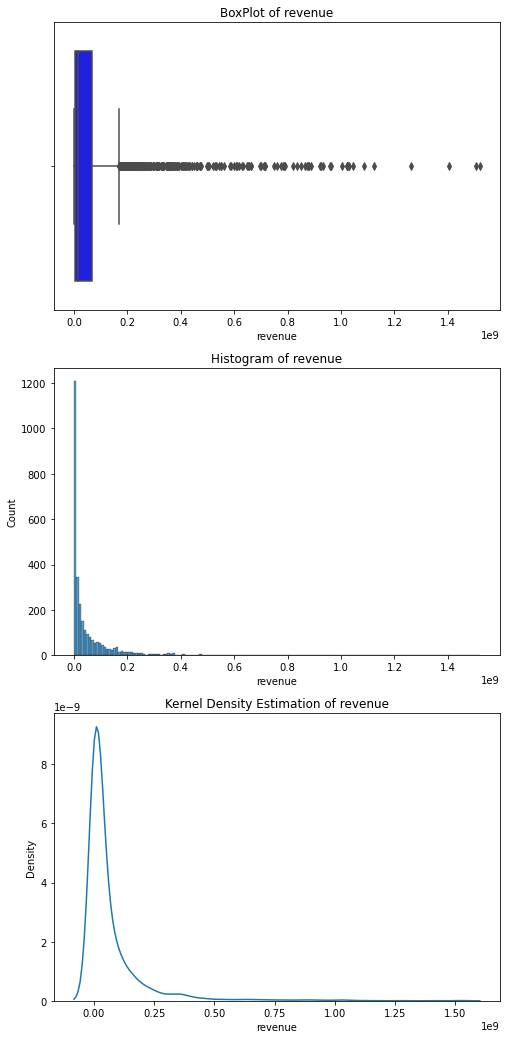

In [26]:
f, ax = plt.subplots(3, figsize=(8,18))
sns.boxplot(x=df_train.revenue, ax=ax[0], color='blue')
ax[0].set_title("BoxPlot of revenue")

sns.histplot(df_train, ax=ax[1], x="revenue")
ax[1].set_title("Histogram of revenue")

sns.kdeplot(df_train.revenue,  ax=ax[2])
ax[2].set_title("Kernel Density Estimation of revenue")

From the 2nd graph, there are a lot of revenue variables are incredibly low, they are lower than $10,000,000
Therefore, we used Logarithm Transformation to see if it can "smoothing" the dataset. 

### After Logarithm Transformation

Text(0.5, 1.0, 'Kernel Density Estimation of log_revenue')

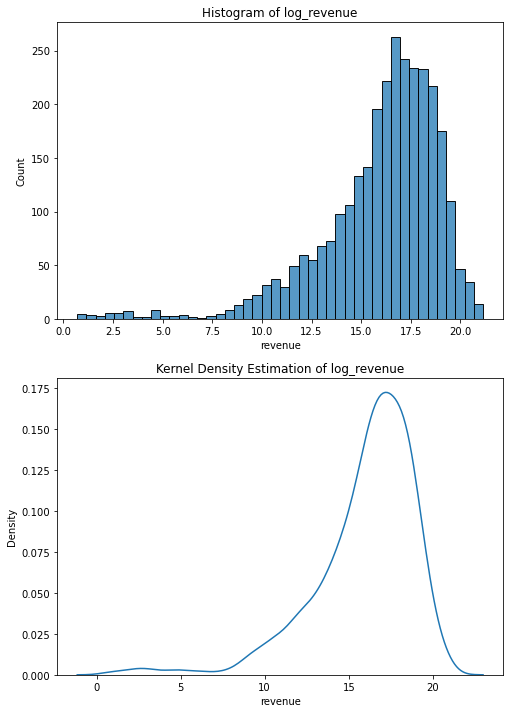

In [27]:
# Revenue undergo Logarithm Transformation
g, ax = plt.subplots(2, figsize=(8,12))
log_revenue = np.log1p(df_train['revenue'])

sns.histplot(log_revenue, ax=ax[0])
ax[0].set_title("Histogram of log_revenue")

sns.kdeplot(log_revenue,  ax=ax[1])
ax[1].set_title("Kernel Density Estimation of log_revenue")

By compaison, the 5th graph for Logarithm revenue is more look like a normal distribution (with a bit right-skewed), and there is no extreme number for count in the 4th graph, so this distribution is more easy to handle after Logarithm Transformation

### Other Variables:

### Budget
This column the budget of the movie
We will start with Budget first since its correlation with revenue is very high, which is around 0.75.

#### Univariate Analysis

In [28]:
df_train['budget'].describe()

count    2.996000e+03
mean     2.688155e+07
std      3.503657e+07
min      1.000000e+00
25%      9.000000e+06
50%      1.600000e+07
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

Text(0.5, 1.0, 'Kernel Density Estimation of budget')

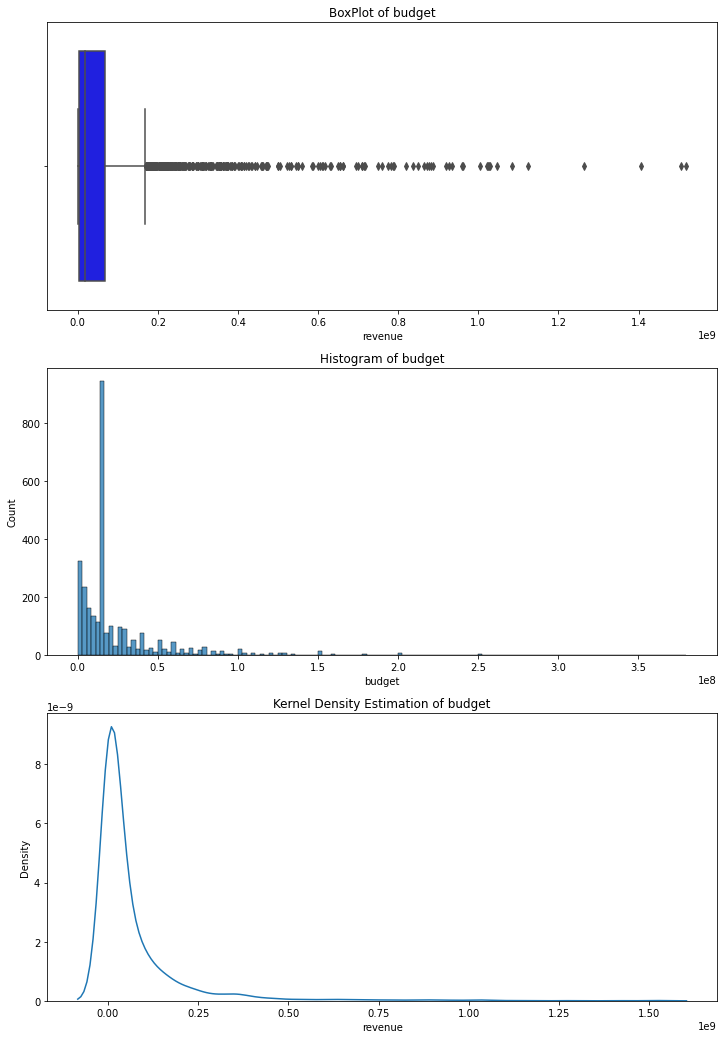

In [29]:
f, ax = plt.subplots(3, figsize=(12,18))
sns.boxplot(x=df_train.revenue, ax=ax[0], color='blue')
ax[0].set_title("BoxPlot of budget")

sns.histplot(df_train, ax=ax[1], x="budget")
ax[1].set_title("Histogram of budget")

sns.kdeplot(df_train.revenue,  ax=ax[2])
ax[2].set_title("Kernel Density Estimation of budget")

From the above 3 graph, it is very similar to the distribution of revenue. It looks strange and we are going to use log transformation on it.

### After Logarithm Transformation

Text(0.5, 1.0, 'Kernel Density Estimation of log_budget')

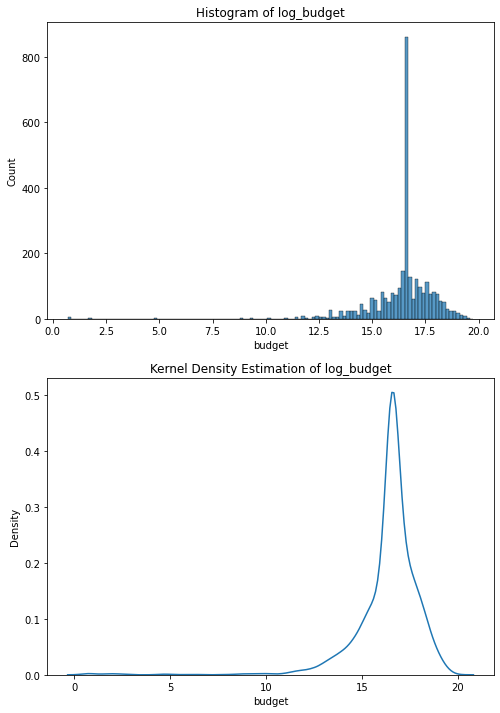

In [30]:
# Budget undergo Logarithm Transformation
g, ax = plt.subplots(2, figsize=(8,12))
log_budget = np.log1p(df_train['budget'])

sns.histplot(log_budget, ax=ax[0])
ax[0].set_title("Histogram of log_budget")

sns.kdeplot(log_budget,  ax=ax[1])
ax[1].set_title("Kernel Density Estimation of log_budget")

#### Bivariate Analysis

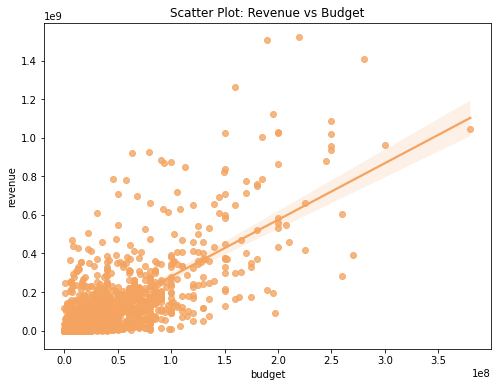

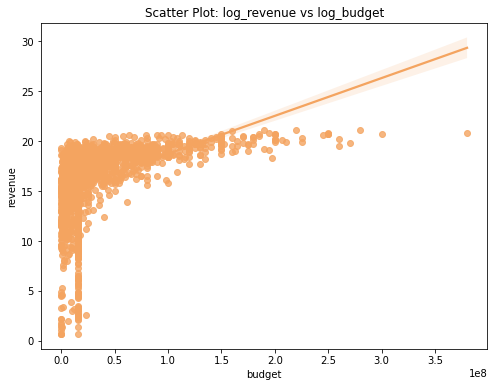

In [31]:
# Scatter plot can be used to investigate the relationship between 2 continuous variables
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x= df_train['budget'], y= df_train['revenue'], color="sandybrown")
ax.set_title('Scatter Plot: Revenue vs Budget');

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x= df_train['budget'], y= np.log1p(df_train['revenue']), color="sandybrown")
ax.set_title('Scatter Plot: log_revenue vs log_budget');

In [32]:
# Compare correlation for different combinations 
corr_revenue_budget = np.corrcoef(df_train['budget'], df_train['revenue'])[0,1]
print("Correlation between revenue and budget:  %.4f" % corr_revenue_budget)

corr_revenue_budget = np.corrcoef(log_budget, log_revenue)[0,1]
print("Correlation between log_revenue and log_budget:  %.4f" % corr_revenue_budget)

corr_revenue_budget = np.corrcoef(df_train['budget'], log_revenue)[0,1]
print("Correlation between log_revenue and budget:  %.4f" % corr_revenue_budget)

corr_revenue_budget = np.corrcoef(log_budget, df_train['revenue'])[0,1]
print("Correlation between revenue and log_budget:  %.4f" % corr_revenue_budget)

Correlation between revenue and budget:  0.7470
Correlation between log_revenue and log_budget:  0.4556
Correlation between log_revenue and budget:  0.4339
Correlation between revenue and log_budget:  0.3711


Since the correlation between revenue and budget is around 0.75 and we can see strong relationship between them in above scatter plot. Therefore, the variable budget will be incldued in the modelling.

### Popularity

In [33]:
df_train['popularity'].describe()

count    2996.000000
mean        8.469373
std        12.109948
min         0.000001
25%         4.028773
50%         7.388592
75%        10.893978
max       294.337037
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Kernel Density Estimation of Popularity')

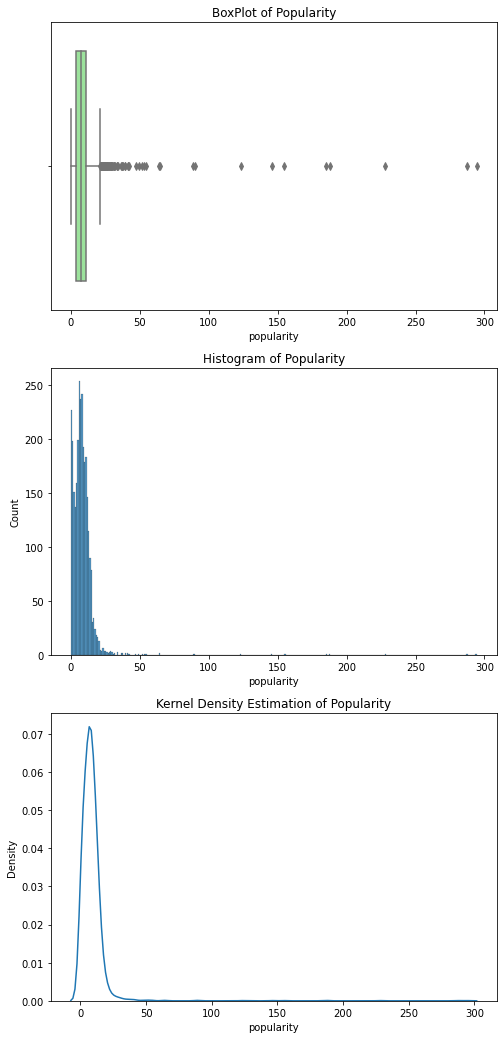

In [34]:
f, ax = plt.subplots(3, figsize=(8,18))
sns.boxplot(x=df_train.popularity, ax=ax[0], color='lightgreen')
ax[0].set_title("BoxPlot of Popularity")

sns.histplot(df_train, ax=ax[1], x="popularity")
ax[1].set_title("Histogram of Popularity")

sns.kdeplot(df_train.popularity,  ax=ax[2])
ax[2].set_title("Kernel Density Estimation of Popularity")

The issue of the above distribution is that too many nearly zero score and there is some extreme popularity over 100, so we will apply Logarithm Transformation to smooth the distribution.

Text(0.5, 1.0, 'Kernel Density Estimation of log_popularity')

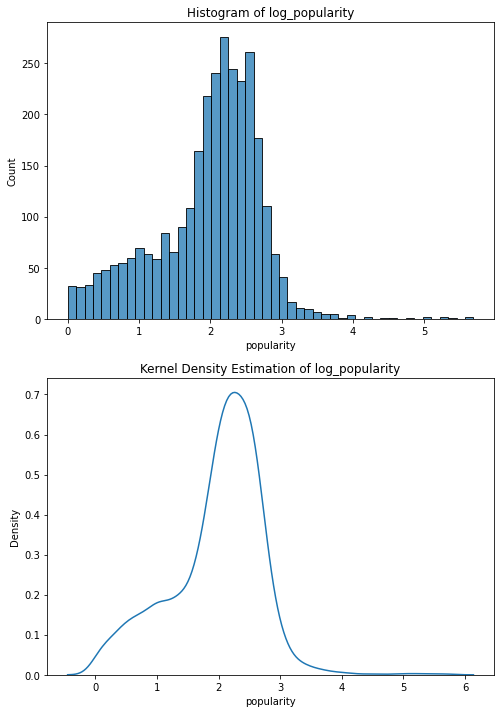

In [35]:
# Popularity undergo Logarithm Transformation
h, ax = plt.subplots(2, figsize=(8,12))
log_popularity = np.log1p(df_train['popularity'])

sns.histplot(log_popularity, ax=ax[0])
ax[0].set_title("Histogram of log_popularity")

sns.kdeplot(log_popularity,  ax=ax[1])
ax[1].set_title("Kernel Density Estimation of log_popularity")

The distribution become much better and the range of popularity (after Logarithm Transformation) can range from 0 to 7.
Let's see the relationship between log_revenue and log_popularity.

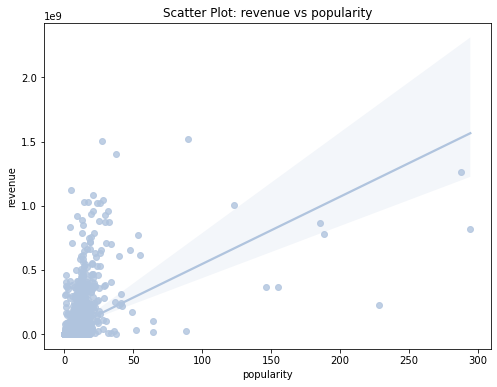

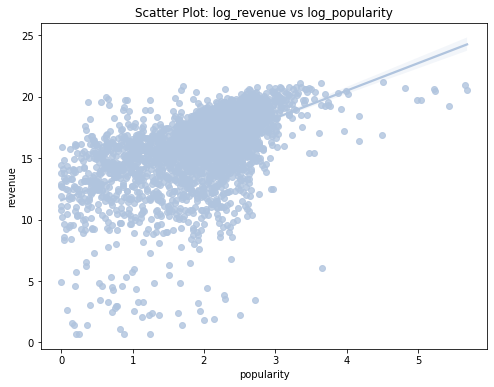

In [36]:
# Scatter plot can be used to investigate the relationship between 2 continuous variables
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x=df_train['popularity'], y= df_train['revenue'], color="lightsteelblue")
ax.set_title('Scatter Plot: revenue vs popularity');

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x= log_popularity, y= log_revenue, color="lightsteelblue")
ax.set_title('Scatter Plot: log_revenue vs log_popularity');

In [37]:
corr_revenue_popularity = np.corrcoef(df_train['popularity'], df_train['revenue'])[0,1]
print("Correlation between revenue and popularity:  %.4f" % corr_revenue_popularity)

corr_log_revenue_log_popularity = np.corrcoef(log_popularity, log_revenue)[0,1]
print("Correlation between log_revenue and log_popularity:  %.4f" % corr_log_revenue_log_popularity)

Correlation between revenue and popularity:  0.4614
Correlation between log_revenue and log_popularity:  0.5403


Correlation between log_revenue and log_popularity is larger than that of Correlation between revenue and popularity, we will take a look on more variables to decide whether we should use revenue and log_revenue for modeling.

### Runtime

In [38]:
df_train['runtime'].describe()

count    2996.000000
mean      107.894860
std        22.061031
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

Text(0.5, 1.0, 'Kernel Density Estimation of Runtime')

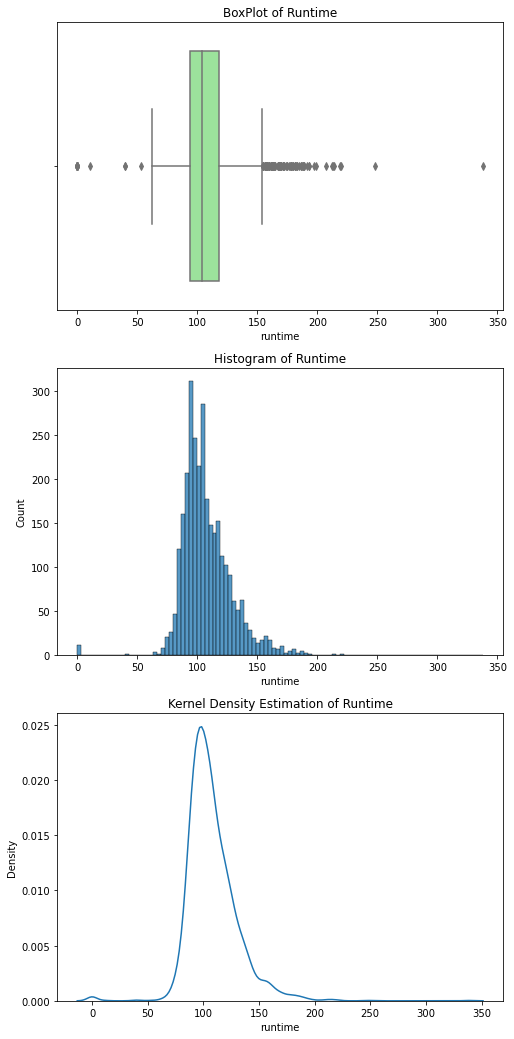

In [39]:
f, ax = plt.subplots(3, figsize=(8,18))
sns.boxplot(x=df_train.runtime, ax=ax[0], color='lightgreen')
ax[0].set_title("BoxPlot of Runtime")

sns.histplot(df_train, ax=ax[1], x="runtime")
ax[1].set_title("Histogram of Runtime")

sns.kdeplot(df_train.runtime,  ax=ax[2])
ax[2].set_title("Kernel Density Estimation of Runtime")

The distribution of runtime looks good, let us look into the relationship between revenue and runtime.

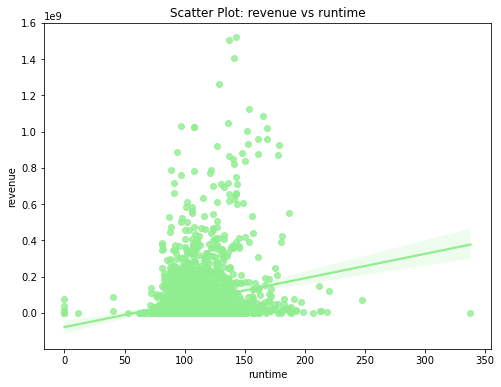

In [40]:
# Scatter plot can be used to investigate the relationship between 2 continuous variables
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x=df_train['runtime'], y= df_train['revenue'], color="lightgreen")
ax.set_title('Scatter Plot: revenue vs runtime');


In [41]:
corr_revenue_runtime = np.corrcoef(df_train['runtime'], df_train['revenue'])[0,1]
print("Correlation between revenue and runtime:  %.4f" % corr_revenue_runtime)

Correlation between revenue and runtime:  0.2159


The correlaion between revenue and runtime is around 0.22 which is quite small, but we can still include it in the modeling first (and will try to take out this variable from modeling to compare)

## Non-Numerical Variables


### Removing columns with less linkage with revenue by common sense
In order to reduce the complexity of the task, we will filter out some columns that is less relevant to revenue by common sense.

Columns will be removed:
<br>id (temporary id for a movie, it does not have any value for analysis)
<br>homepage (not useful for analysis)
<br>imdb_id (it is an unique key for a movie, but it does not have any value for analysis)
<br>original_title (not useful for analysis)
<br>overview (will not apply complex text mining in the project)
<br>poster_path (it is not a complete weblink) 
<br>status (all status in train data are equal to "Released" after pre-data processing)
<br>title (not useful for analysis)
<br>spoken_languages (people concern on original language more)

In [42]:
remove_cols = ['id', 'homepage', 'imdb_id', 'original_title', 'overview', 'poster_path', 'status', 'title', 'spoken_languages']
df_train.drop(remove_cols,axis=1,inplace=True)
df_test.drop(remove_cols,axis=1,inplace=True)
print(df_train.shape)

(2996, 14)


### belongs_to_collection
This column means if the movie belongs to a collection. If it belongs to a collection or a series (i.e. Harry Potter, The Lord of the Rings, Avengers etc.), it is not a standalone movie.

In [43]:
df_train['belongs_to_collection'] = df_train['belongs_to_collection'].apply(lambda x: 0 if x==0 else 1)
df_test['belongs_to_collection'] = df_test['belongs_to_collection'].apply(lambda x: 0 if x==0 else 1)

In [44]:
print(df_train.belongs_to_collection.value_counts())

0    2393
1     603
Name: belongs_to_collection, dtype: int64


[Text(0, 0, 'No Collection Movie'), Text(1, 0, 'Collection Movie')]

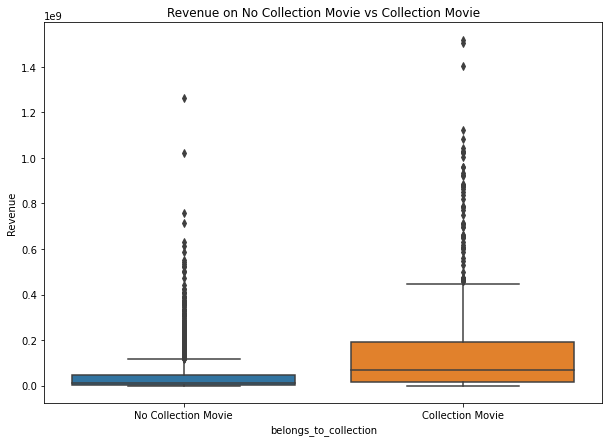

In [45]:
labels = 'No Collection Movie', 'Collection Movie'

f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x='belongs_to_collection', y='revenue', data=df_train)
plt.title('Revenue on No Collection Movie vs Collection Movie')
plt.ylabel("Revenue")
ax.set_xticklabels(labels)

In [46]:
corr_revenue_collection = np.corrcoef(df_train['belongs_to_collection'], df_train['revenue'])[0,1]
print("Correlation between revenue and belongs_to_collection:  %.4f" % corr_revenue_collection)

Correlation between revenue and belongs_to_collection:  0.3398


From the above graph, we can see that movie belongs to collection have more revenue in general. Also, the correlation between revenue and belongs_to_collection is positive and quite significant. Therefore, this variable will be included in modeling.

### Tagline
A movie tagline is a short text which serves to clarify an idea for, or is designed with a form of, dramatic effect. Usually, a strong tagline or slogan can attract more people to watch the film.

In [47]:
df_train['tagline'] = df_train['tagline'].apply(lambda x: 0 if x==0 else 1)
df_test['tagline'] = df_test['tagline'].apply(lambda x: 0 if x==0 else 1)

In [48]:
print(df_train.tagline.value_counts())

1    2400
0     596
Name: tagline, dtype: int64


[Text(0, 0, 'Without Tagline'), Text(1, 0, 'With Tagline')]

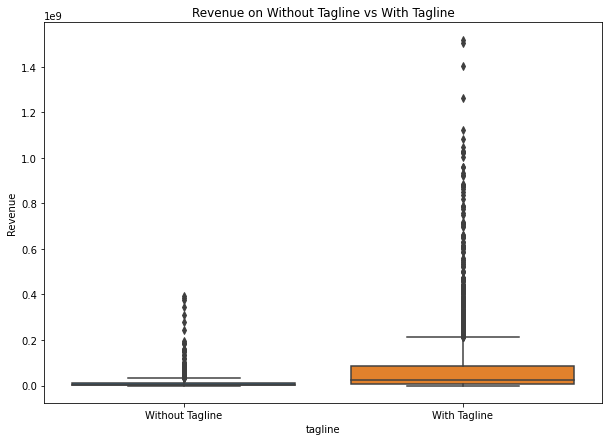

In [49]:
labels = 'Without Tagline', 'With Tagline'

f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x='tagline', y='revenue', data=df_train)
plt.title('Revenue on Without Tagline vs With Tagline')
plt.ylabel("Revenue")
ax.set_xticklabels(labels)

In [50]:
corr_revenue_tagline = np.corrcoef(df_train['tagline'], df_train['revenue'])[0,1]
print("Correlation between revenue and tagline:  %.4f" % corr_revenue_tagline)

Correlation between revenue and tagline:  0.1804


From the above graph, we can see that movie with tagine can generate more revenue in general. The correlation between revenue and tagine is positive. However, the correlation is pretty weak between them. But we can still include this variable in modeling at first.

### original_language
As we know, movies are dominated by Hollywood in U.S. And the original language of top 50 highest-grossing films is English.
Therefore, I will do the analysis to study the relationship between revenue and original language. (focus on English/non-English)

In [51]:
df_train['original_language'] = df_train['original_language'].apply(lambda x: 1 if x=="en" else 0)
df_test['original_language'] = df_test['original_language'].apply(lambda x: 1 if x=="en" else 0)

In [52]:
print(df_train.original_language.value_counts())

1    2571
0     425
Name: original_language, dtype: int64


[Text(0, 0, 'Non-English Films'), Text(1, 0, 'English Films')]

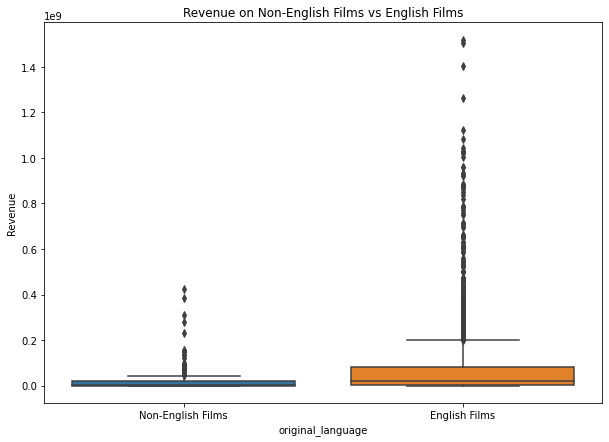

In [53]:
labels = 'Non-English Films', 'English Films'

f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x='original_language', y='revenue', data=df_train)
plt.title('Revenue on Non-English Films vs English Films')
plt.ylabel("Revenue")
ax.set_xticklabels(labels)

In [54]:
corr_revenue_language = np.corrcoef(df_train['original_language'], df_train['revenue'])[0,1]
print("Correlation between revenue and original_language:  %.4f" % corr_revenue_language)

Correlation between revenue and original_language:  0.1424


From the above graph, we can see that English films can generate more revenue than that of Non-English films. The correlation between revenue and original language is positive. However, the correlation is pretty weak between them. But we can still include this variable in modeling at first

### release_date
Release Date is very important for the revenue, especially for the year and the month.
For the specific year, the revenue is mainly impacted by inflation level and some special event (like plague, war etc.)
For the specific month, the revenue is mainly impacted by seasonality (summer holiday, Chirstmas holiday etc.) For the day of week, we are currently not sure if there is any relationship with revenue, but we are going to check it on below.

In [55]:
# Train Data
df_train['release_year']=pd.to_datetime(df_train['release_date']).dt.year
df_train['release_month']=pd.to_datetime(df_train['release_date']).dt.month
df_train['release_weekday']=pd.to_datetime(df_train['release_date']).dt.dayofweek

# Test Data
df_test['release_year']=pd.to_datetime(df_test['release_date']).dt.year
df_test['release_month']=pd.to_datetime(df_test['release_date']).dt.month
df_test['release_weekday']=pd.to_datetime(df_test['release_date']).dt.dayofweek

Text(0.5, 1.0, 'Average Revenue in Release Year')

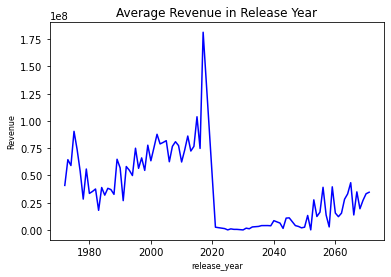

In [56]:
df_train.groupby('release_year')['revenue'].mean().plot(color='blue')
plt.xlabel('release_year',fontsize = 8)
plt.ylabel('Revenue',fontsize = 8);
plt.title("Average Revenue in Release Year")

In the above graph, some release year of movie is larger than 2019, it does not make sense since this kaggle competition was launched in 2018, so the year of lastest film in the dataset shpuld be 2018. The error exist due to 2 digit year, so we need to minus the year by 100 years to make it correct.

Text(0.5, 1.0, 'Average Revenue in Release Year')

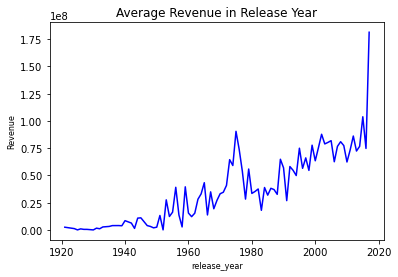

In [57]:
# Data Cleansing
df_train['release_year']= df_train['release_year'].apply(lambda x: x-100 if x>2018 else x)
df_train.groupby('release_year')['revenue'].mean().plot(color='blue')
plt.xlabel('release_year',fontsize = 8)
plt.ylabel('Revenue',fontsize = 8);
plt.title("Average Revenue in Release Year")

Text(0.5, 1.0, 'Average Revenue in Release Month')

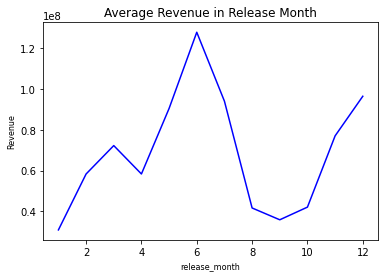

In [58]:
df_train.groupby('release_month')['revenue'].mean().plot(color='blue')
plt.xlabel('release_month',fontsize = 8)
plt.ylabel('Revenue',fontsize = 8);
plt.title("Average Revenue in Release Month")

As expected, with the increase of year, the revenue also increase. It is mainly due to continue inflation. For the month, revenue is better during holiday and Christmas. We will include this 2 variables in our model.

Text(0.5, 1.0, 'Average Revenue in Release Weekday')

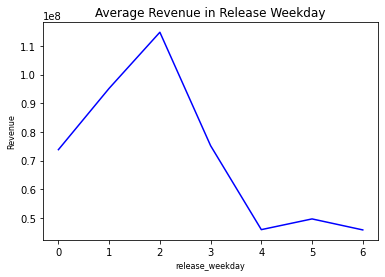

In [59]:
df_train.groupby('release_weekday')['revenue'].mean().plot(color='blue')
plt.xlabel('release_weekday',fontsize = 8)
plt.ylabel('Revenue',fontsize = 8);
plt.title("Average Revenue in Release Weekday")

It seems the difference between each weekday is quite large, and this is unexpected. We will also include this into modeling.

### genres
The column genres means the category of films. Assume the first genre shown in the dictionary is the main genre for that film.

In [60]:
# Extract the main genre using regular expression
df_train['main_genre'] = df_train['genres'].apply(lambda x:re.findall("'name': \'(.+?)\'|$", x)[0])
df_test['main_genre'] = df_test['genres'].apply(lambda x:re.findall("'name': \'(.+?)\'|$", x)[0])
df_train['main_genre']

0         Comedy
1         Comedy
2          Drama
3       Thriller
4         Action
          ...   
2995      Comedy
2996       Drama
2997       Crime
2998      Comedy
2999    Thriller
Name: main_genre, Length: 2996, dtype: object

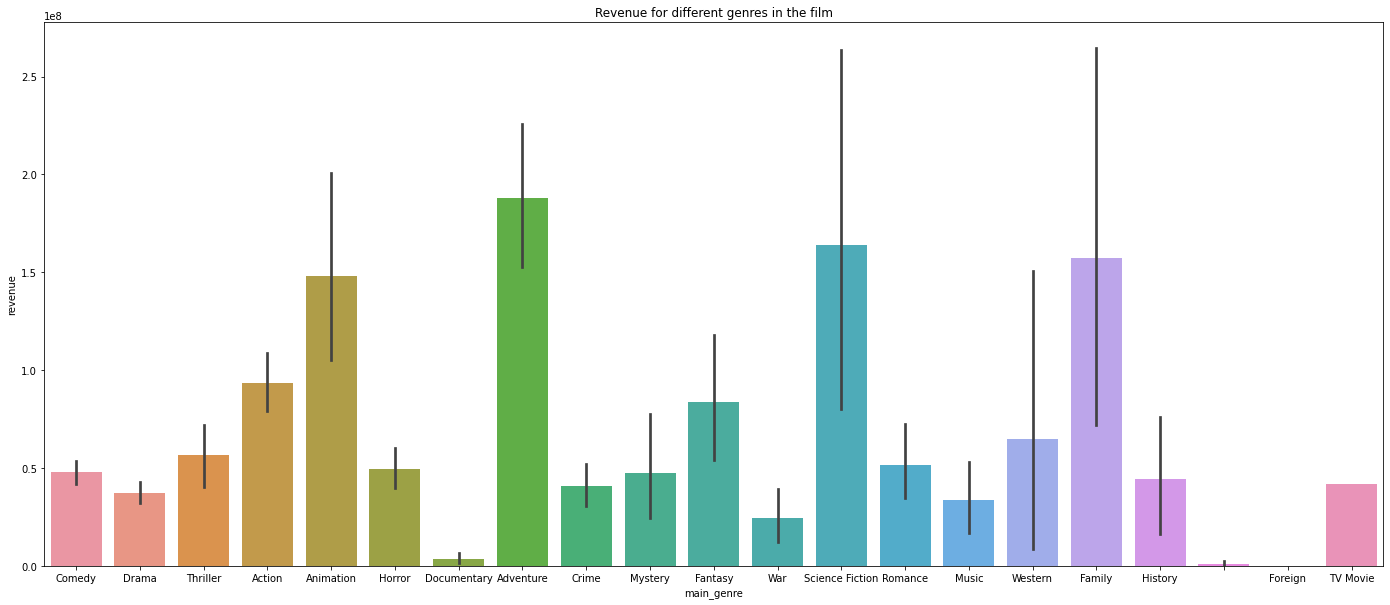

In [61]:
j, ax = plt.subplots(figsize=(24, 10))
sns.barplot(x='main_genre', y='revenue', data=df_train);
plt.title('Revenue for different genres in the film');

From the above graph, some movies type like Adventure and science Ficition can generate more revenue, while Foreign and Documentary generate the least revenue. 

In [62]:
# Use label encoder to transform the text to number
labelencoder = LabelEncoder()
df_train['main_genre_label'] = labelencoder.fit_transform(df_train['main_genre'])
df_test['main_genre_label'] = labelencoder.fit_transform(df_test['main_genre'])

### production_companies
The column production_companies means the production company of films. We are going to find out good production companies according to their mean revenue

<AxesSubplot:>

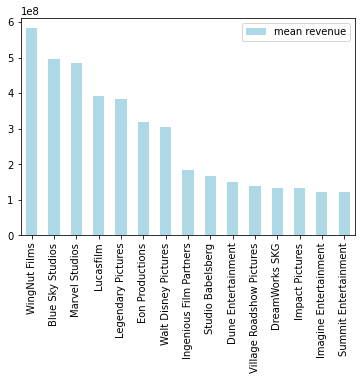

In [63]:
# Extract all production company names from the dictionary
df_train['prod_comp_all'] = df_train['production_companies'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))
df_test['prod_comp_all'] = df_test['production_companies'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))


good_prod_comp_dict = {}
for comp in df_train[["revenue", "prod_comp_all"]].values:
   # compare revenue between production companies
    tmp = 1
    if len(comp[1]) < tmp:
        tmp = len(comp[1])
    for i in range(tmp):
        if comp[1][i] not in good_prod_comp_dict:
            good_prod_comp_dict[comp[1][i]] = [comp[0], 1]
        else:
            good_prod_comp_dict[comp[1][i]][0] += comp[0]
            good_prod_comp_dict[comp[1][i]][1] += 1    

good_prod_comp_dict = {k: v for k, v in good_prod_comp_dict.items() if v[1] >= 5}

for company in good_prod_comp_dict:
    good_prod_comp_dict[company][0] = good_prod_comp_dict[company][0]/good_prod_comp_dict[company][1]
    good_prod_comp_dict[company] = good_prod_comp_dict[company][0]

    
prod_comp_df = pd.DataFrame.from_dict(good_prod_comp_dict, orient='index', columns=["mean revenue"])
prod_comp_df.sort_values(by="mean revenue", ascending=False).head(15).plot.bar(color='lightblue')



In [64]:
# Check if it is a good production company by revenue (top 30 production companies)
# if it is good, then the value will be 1, else zero
def GoodProductionCompany(comp):
    if len(comp) < 1 or comp[0] not in list(good_prod_comp_dict)[:30]:
        return 0
    else:
        return 1
    
df_train['GoodProductionCompany'] = df_train['prod_comp_all'].apply(lambda x: GoodProductionCompany(x))
df_test['GoodProductionCompany'] = df_test['prod_comp_all'].apply(lambda x: GoodProductionCompany(x))

### production_countries
The column production_countries means the production country of films. Assume the first production_countries shown in the dictionary is the main production country for that film

In [65]:
# Extract the main production country using regular expression
df_train['main_production_countries'] = df_train['production_countries'].apply(lambda x:re.findall("'name': \'(.+?)\'|$", x)[0])
df_test['main_production_countries'] = df_test['production_countries'].apply(lambda x:re.findall("'name': \'(.+?)\'|$", x)[0])
df_train['main_production_countries']

0       United States of America
1       United States of America
2       United States of America
3                          India
4                    South Korea
                  ...           
2995    United States of America
2996                     Denmark
2997    United States of America
2998    United States of America
2999    United States of America
Name: main_production_countries, Length: 2996, dtype: object

In [66]:
# Number of unique main production companies
df_train['main_production_countries'].unique().shape[0]

61

In [67]:
# Use label encoder to transform the text to number
labelencoder = LabelEncoder()
df_train['main_production_countries'] = labelencoder.fit_transform(df_train['production_countries'])
df_test['main_production_countries'] = labelencoder.fit_transform(df_test['production_countries'])

### cast
The column cast means the important roles of films. We are going to find out good cast according to their mean revenue

<AxesSubplot:>

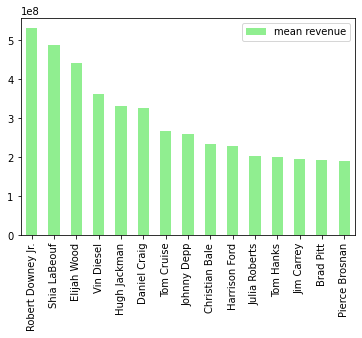

In [68]:
# Extract all cast names from the dictionary
df_train['cast_all'] = df_train['cast'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))
df_test['cast_all'] = df_test['cast'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

good_cast_dict = {}
for ppl in df_train[["revenue", "cast_all"]].values:
   # compare revenue between cast
    tmp = 1
    if len(ppl[1]) < tmp:
        tmp = len(ppl[1])
    for i in range(tmp):
        if ppl[1][i] not in good_cast_dict:
            good_cast_dict[ppl[1][i]] = [ppl[0], 1]
        else:
            good_cast_dict[ppl[1][i]][0] += ppl[0]
            good_cast_dict[ppl[1][i]][1] += 1    

good_cast_dict = {k: v for k, v in good_cast_dict.items() if v[1] >= 5}

for ppl in good_cast_dict:
    good_cast_dict[ppl][0] = good_cast_dict[ppl][0]/good_cast_dict[ppl][1]
    good_cast_dict[ppl] = good_cast_dict[ppl][0]

    
good_cast_df = pd.DataFrame.from_dict(good_cast_dict, orient='index', columns=["mean revenue"])
good_cast_df.sort_values(by="mean revenue", ascending=False).head(15).plot.bar(color='lightgreen')

In [69]:
# Check if it is a good cast by revenue (top 100 cast)
# if it is good, then the value will be 1, else zero
def GoodCast(ppl):
    if len(ppl) < 1 or ppl[0] not in list(good_cast_dict)[:100]:
        return 0
    else:
        return 1
    
df_train['GoodCast'] = df_train['cast_all'].apply(lambda x: GoodCast(x))
df_test['GoodCast'] = df_test['cast_all'].apply(lambda x: GoodCast(x))


In [70]:
df_train['GoodCast'].value_counts()

0    2212
1     784
Name: GoodCast, dtype: int64

### crew
The column crew means the production team of films. Assume the first name shown in the dictionary is the director for that film

<AxesSubplot:>

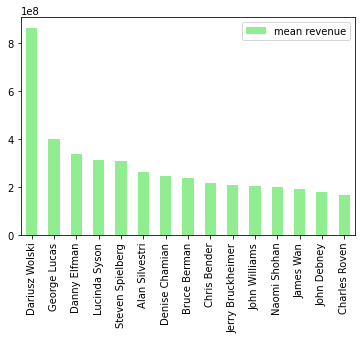

In [71]:
# Extract all crew names from the dictionary
df_train['crew_all'] = df_train['crew'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))
df_test['crew_all'] = df_test['crew'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

good_crew_dict = {}
for ppl in df_train[["revenue", "crew_all"]].values:
   # compare revenue between cast
    tmp = 1
    if len(ppl[1]) < tmp:
        tmp = len(ppl[1])
    for i in range(tmp):
        if ppl[1][i] not in good_crew_dict:
            good_crew_dict[ppl[1][i]] = [ppl[0], 1]
        else:
            good_crew_dict[ppl[1][i]][0] += ppl[0]
            good_crew_dict[ppl[1][i]][1] += 1    

good_crew_dict = {k: v for k, v in good_crew_dict.items() if v[1] >= 5}

for ppl in good_crew_dict:
    good_crew_dict[ppl][0] = good_crew_dict[ppl][0]/good_crew_dict[ppl][1]
    good_crew_dict[ppl] = good_crew_dict[ppl][0]

    
good_crew_df = pd.DataFrame.from_dict(good_crew_dict, orient='index', columns=["mean revenue"])
good_crew_df.sort_values(by="mean revenue", ascending=False).head(15).plot.bar(color='lightgreen')

In [72]:
# Check if it is a good crew by revenue (top 100 crew)
# if it is good, then the value will be 1, else zero
def GoodCrew(ppl):
    if len(ppl) < 1 or ppl[0] not in list(good_crew_dict)[:100]:
        return 0
    else:
        return 1
    
df_train['GoodCrew'] = df_train['crew_all'].apply(lambda x: GoodCrew(x))
df_test['GoodCrew'] = df_test['crew_all'].apply(lambda x: GoodCrew(x))

In [73]:
df_train['GoodCrew'].value_counts()

0    2509
1     487
Name: GoodCrew, dtype: int64

### Keywords
The column Keywords means the theme of films. Assume the first name shown in the dictionary is the main Keyword for that film

In [74]:
# Extract the main crew (director) using regular expression
df_train['main_Keywords'] = df_train['Keywords'].apply(lambda x:re.findall("'name': \'(.+?)\'|$", x)[0])
df_test['main_Keywords'] = df_test['Keywords'].apply(lambda x:re.findall("'name': \'(.+?)\'|$", x)[0])
df_train['main_Keywords'] 

0         time travel
1          coronation
2                jazz
3             mystery
4                    
            ...      
2995           prison
2996           sweden
2997    assassination
2998            beach
2999              cia
Name: main_Keywords, Length: 2996, dtype: object

In [75]:
# Number of unique main Keywords
df_train['main_Keywords'].unique().shape[0]

1030

In [76]:
# Use label encoder to transform the text to number
labelencoder = LabelEncoder()
df_train['main_Keywords'] = labelencoder.fit_transform(df_train['main_Keywords'])
df_test['main_Keywords'] = labelencoder.fit_transform(df_test['main_Keywords'])

# Modeling

In [77]:
remove_cols = ['crew_all','cast_all','prod_comp_all', 'cast', 'crew', 'Keywords', 'main_genre','genres', 'production_companies', 'production_countries', 'release_date']
df_train.drop(remove_cols,axis=1,inplace=True)
df_test.drop(remove_cols,axis=1,inplace=True)
print(df_train.shape)
print(df_test.shape)

(2996, 16)
(4398, 15)


In [78]:
df_train.corr().revenue
y=df_train.revenue
X=df_train.drop('revenue',axis=1)

2 sets of data undergo modeling: 
<br> 1. Data with log(revenue) and log(budget)
<br> 2. Data with normal revenue and normal budget

## 1st Experiment (without Log Transforamtion, Default Parameters)

In [79]:
# 1st Experiment - Normal Revenue & Normal Budget & Normal Popularity
df_train_normal = df_train.copy()

y_normal =df_train_normal.revenue
df_train_normal.drop('revenue',axis=1,inplace=True)
X_normal =df_train_normal

### Variables for modeling
1. belongs_to_collection	
2. budget	
3. original_language	
4. popularity	
5. runtime	
6. tagline	
7. release_year	
8. release_month	
9. release_weekday	
10. GoodProductionCompany	
11. main_production_countries	
12. GoodCast	
13. GoodCrew	
14. main_Keywords

In [80]:
df_train_normal.head()

,belongs_to_collection,budget,original_language,popularity,runtime,tagline,release_year,release_month,release_weekday,main_genre_label,GoodProductionCompany,main_production_countries,GoodCast,GoodCrew,main_Keywords
0,1,14000000.0,1,6.575393,93.0,1,2015,2,4,4,1,317,0,0,932
1,1,40000000.0,1,8.248895,113.0,1,2004,8,4,4,1,317,0,1,208
2,0,3300000.0,1,64.299990,105.0,1,2014,10,4,7,0,317,1,1,480
3,0,1200000.0,0,3.174936,122.0,0,2012,3,4,18,0,211,0,0,606
4,0,16000000.0,0,1.148070,118.0,0,2009,2,3,1,0,237,0,0,0


In [81]:
# Split in to 80% Train and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X_normal,y_normal,test_size=0.15,random_state=1)

### Linear Regression

In [82]:
linreg = LinearRegression().fit(X_train, y_train)
linreg_pred= linreg.predict(X_test)

In [83]:
linreg_rmse= mean_squared_error(y_test, linreg_pred, squared=False)
linreg_mae= np.mean(abs(linreg_pred-y_test))
linreg_r2 = r2_score(y_test, linreg_pred)

In [84]:
print("Root Mean Squared Error (linear regression model) : {:.0f}"
     .format(linreg_rmse))
print("Mean Absolute Error Error (linear regression model) : {:.0f}"
     .format(linreg_mae))
print("r2_score (linear model): {:.2f}"
      .format(linreg_r2))

Root Mean Squared Error (linear regression model) : 78521792
Mean Absolute Error Error (linear regression model) : 46517900
r2_score (linear model): 0.47


### Random Forest Regression

In [85]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
rfr_pred = rfr_model.predict(X_test)

In [86]:
rfr_rmse= mean_squared_error(y_test, rfr_pred, squared=False)
rfr_mae= np.mean(abs(rfr_pred-y_test))
rfr_r2 = r2_score(y_test, rfr_pred)

In [87]:
print("Root Mean Squared Error (random forest regression) : {:.0f}"
     .format(rfr_rmse))
print("Mean Absolute Error Error (random forest regression) : {:.0f}"
     .format(rfr_mae))
print("r2_score (random forest regression): {:.2f}"
      .format(rfr_r2))

Root Mean Squared Error (random forest regression) : 77750168
Mean Absolute Error Error (random forest regression) : 40869074
r2_score (random forest regression): 0.48


In [88]:
feat_imp = rfr_model.feature_importances_
num = np.argsort(feat_imp )[::-1]

print("Feature importances ranking:")

for f in range(14):
    print("%d. %s (%f)" % (f + 1, X_train.columns[num [f]], feat_imp[num [f]]))

Feature importances ranking:
1. budget (0.591099)
2. popularity (0.156967)
3. runtime (0.063934)
4. release_month (0.032914)
5. release_year (0.032140)
6. belongs_to_collection (0.031570)
7. main_Keywords (0.028428)
8. main_genre_label (0.016181)
9. release_weekday (0.014422)
10. main_production_countries (0.012491)
11. GoodProductionCompany (0.006578)
12. GoodCrew (0.005947)
13. GoodCast (0.005109)
14. original_language (0.001256)


### XGBoost (eXtreme Gradient Boosting)

In [89]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [90]:
xgb_rmse= mean_squared_error(y_test, xgb_pred, squared=False)
xgb_mae= np.mean(abs(xgb_pred-y_test))
xgb_r2 = r2_score(y_test, xgb_pred)

In [91]:
print("Root Mean Squared Error (XGBoost) : {:.0f}"
     .format(xgb_rmse))
print("Mean Absolute Error Error (XGBoost) : {:.0f}"
     .format(xgb_mae))
print("r2_score (XGBoost): {:.2f}"
      .format(xgb_r2))

Root Mean Squared Error (XGBoost) : 83684182
Mean Absolute Error Error (XGBoost) : 43017332
r2_score (XGBoost): 0.40


In [92]:
feat_imp = xgb_model.feature_importances_
num  = np.argsort(feat_imp )[::-1]

print("Feature importances ranking:")

for f in range(14):
    print("%d. %s (%f)" % (f + 1, X_train.columns[num[f]], feat_imp[num[f]]))

Feature importances ranking:
1. budget (0.413823)
2. belongs_to_collection (0.116789)
3. popularity (0.086322)
4. main_production_countries (0.047922)
5. GoodProductionCompany (0.046077)
6. main_genre_label (0.043503)
7. runtime (0.039391)
8. release_month (0.037292)
9. release_year (0.030933)
10. GoodCrew (0.030290)
11. GoodCast (0.030017)
12. release_weekday (0.026615)
13. main_Keywords (0.021524)
14. tagline (0.020011)


### LightGBM (Light Gradient Boosting Machine)

In [93]:
import lightgbm as lgb
lgbm_model = lgb.LGBMRegressor()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

In [94]:
lgbm_rmse= mean_squared_error(y_test, lgbm_pred, squared=False)
lgbm_mae= np.mean(abs(lgbm_pred-y_test))
lgbm_r2 = r2_score(y_test, lgbm_pred)

In [95]:
print("Root Mean Squared Error (LightGBM) : {:.0f}"
     .format(lgbm_rmse))
print("Mean Absolute Error Error (LightGBM) : {:.0f}"
     .format(lgbm_mae))
print("r2_score (LightGBM): {:.2f}"
      .format(lgbm_r2))

Root Mean Squared Error (LightGBM) : 80371486
Mean Absolute Error Error (LightGBM) : 40230189
r2_score (LightGBM): 0.45


In [96]:
feat_imp = lgbm_model.feature_importances_
num = np.argsort(feat_imp )[::-1]

print("Feature importances ranking:")

for f in range(14):
    print("%d. %s (%f)" % (f + 1, X_train.columns[num[f]], feat_imp[num[f]]))

Feature importances ranking:
1. popularity (706.000000)
2. budget (650.000000)
3. runtime (340.000000)
4. main_Keywords (302.000000)
5. release_year (267.000000)
6. release_month (175.000000)
7. main_genre_label (159.000000)
8. main_production_countries (98.000000)
9. belongs_to_collection (83.000000)
10. release_weekday (78.000000)
11. GoodProductionCompany (61.000000)
12. GoodCast (34.000000)
13. GoodCrew (32.000000)
14. original_language (8.000000)


## 2nd Experiment (with Logarithm Transformation, Default Parameters)

In [97]:
# 2nd Experiment - Revenue, Budget & Popularity undergo Logarithm Transformation
df_train_log = df_train.copy()
df_train_log['log_budget']=np.log1p(df_train_log['budget'])
df_train_log['log_revenue']=np.log1p(df_train_log['revenue'])
df_train_log['log_popularity']=np.log1p(df_train_log['popularity'])
df_train_log.drop('budget',axis=1,inplace=True)
df_train_log.drop('popularity',axis=1,inplace=True)

df_test_log = df_test.copy()
df_test_log['log_budget']=np.log1p(df_test_log['budget'])
df_test_log['log_popularity']=np.log1p(df_test_log['popularity'])
df_test_log.drop('budget',axis=1,inplace=True)
df_test_log.drop('popularity',axis=1,inplace=True)

y_log =df_train_log.log_revenue
df_train_log.drop('revenue',axis=1,inplace=True)
df_train_log.drop('log_revenue',axis=1,inplace=True)
X_log =df_train_log

### Variables for modeling
1. belongs_to_collection	
2. original_language	
3. log_popularity	
4. runtime	
5. tagline	
6. release_year	
7. release_month	
8. release_weekday	
9. main_genre_label	
10. main_production_countries	
11. main_cast	
12. main_crew	
13. main_Keywords	
14. log_budget

In [98]:
df_train_log.head()

,belongs_to_collection,original_language,runtime,tagline,release_year,release_month,release_weekday,main_genre_label,GoodProductionCompany,main_production_countries,GoodCast,GoodCrew,main_Keywords,log_budget,log_popularity
0,1,1,93.0,1,2015,2,4,4,1,317,0,0,932,16.454568,2.024905
1,1,1,113.0,1,2004,8,4,4,1,317,0,1,208,17.504390,2.224504
2,0,1,105.0,1,2014,10,4,7,0,317,1,1,480,15.009433,4.178992
3,0,0,122.0,0,2012,3,4,18,0,211,0,0,606,13.997833,1.429099
4,0,0,118.0,0,2009,2,3,1,0,237,0,0,0,16.588099,0.764570


In [99]:
# Split Data into 80% Train and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X_log,y_log,test_size=0.2,random_state=1)

### Linear Regression

In [100]:
linreg = LinearRegression().fit(X_train, y_train)
linreg_pred_log= linreg.predict(X_test)

In [101]:
linreg_rmse_log= mean_squared_error(y_test, linreg_pred_log, squared=False)
linreg_mae_log= np.mean(abs(linreg_pred_log-y_test))
linreg_r2_log = r2_score(y_test, linreg_pred_log)

In [102]:
print("Root Mean Squared Error (linear regression model) : {:.4f}"
     .format(linreg_rmse_log))
print("Mean Absolute Error (linear regression model) : {:.4f}"
     .format(linreg_mae_log))
print("r2_score (linear model): {:.2f}"
      .format(linreg_r2_log))

Root Mean Squared Error (linear regression model) : 2.0725
Mean Absolute Error (linear regression model) : 1.4977
r2_score (linear model): 0.45


### Random Forest Regression

In [103]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
rfr_pred_log = rfr_model.predict(X_test)

In [104]:
rfr_rmse_log= mean_squared_error(y_test, rfr_pred_log, squared=False)
rfr_mae_log= np.mean(abs(rfr_pred_log-y_test))
rfr_r2_log = r2_score(y_test, rfr_pred_log)

In [105]:
print("Root Mean Squared Error (random forest regression) : {:.4f}"
     .format(rfr_rmse_log))
print("Mean Absolute Error Error (random forest regression) : {:.4f}"
     .format(rfr_mae_log))
print("r2_score (random forest regression): {:.2f}"
      .format(rfr_r2_log))

Root Mean Squared Error (random forest regression) : 1.8885
Mean Absolute Error Error (random forest regression) : 1.3379
r2_score (random forest regression): 0.55


In [106]:
feat_imp = rfr_model.feature_importances_
num = np.argsort(feat_imp )[::-1]

print("Feature importances ranking:")

for f in range(14):
    print("%d. %s (%f)" % (f + 1, X_train.columns[num[f]], feat_imp[num[f]]))

Feature importances ranking:
1. log_budget (0.390736)
2. log_popularity (0.196020)
3. release_year (0.081708)
4. runtime (0.072462)
5. main_Keywords (0.051477)
6. main_production_countries (0.040835)
7. release_month (0.040585)
8. main_genre_label (0.039511)
9. release_weekday (0.024614)
10. GoodProductionCompany (0.020374)
11. belongs_to_collection (0.016364)
12. tagline (0.008361)
13. original_language (0.006316)
14. GoodCrew (0.005491)


### XGBoost (eXtreme Gradient Boosting)

In [107]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred_log = xgb_model.predict(X_test)

In [108]:
xgb_rmse_log= mean_squared_error(y_test, xgb_pred_log, squared=False)
xgb_mae_log= np.mean(abs(xgb_pred_log-y_test))
xgb_r2_log = r2_score(y_test, xgb_pred_log)

In [109]:
print("Root Mean Squared Error (XGBoost) : {:.4f}"
     .format(xgb_rmse_log))
print("Mean Absolute Error Error (XGBoost) : {:.4f}"
     .format(xgb_mae_log))
print("r2_score (XGBoost): {:.2f}"
      .format(xgb_r2_log))

Root Mean Squared Error (XGBoost) : 1.9973
Mean Absolute Error Error (XGBoost) : 1.4299
r2_score (XGBoost): 0.49


In [110]:
feat_imp = xgb_model.feature_importances_
num = np.argsort(feat_imp )[::-1]

print("Feature importances ranking:")

for f in range(14):
    print("%d. %s (%f)" % (f + 1, X_train.columns[num[f]], feat_imp[num[f]]))

Feature importances ranking:
1. log_budget (0.319045)
2. GoodProductionCompany (0.132548)
3. log_popularity (0.088045)
4. release_year (0.054120)
5. main_production_countries (0.053167)
6. tagline (0.052322)
7. main_genre_label (0.045666)
8. belongs_to_collection (0.039657)
9. release_weekday (0.033555)
10. GoodCast (0.033005)
11. runtime (0.032573)
12. main_Keywords (0.032236)
13. release_month (0.031681)
14. GoodCrew (0.030970)


### LightGBM (Light Gradient Boosting Machine)

In [111]:
import lightgbm as lgb
lgbm_model = lgb.LGBMRegressor()
lgbm_model.fit(X_train, y_train)
lgbm_pred_log = lgbm_model.predict(X_test)

In [112]:
lgbm_rmse_log= mean_squared_error(y_test, lgbm_pred_log, squared=False)
lgbm_mae_log= np.mean(abs(lgbm_pred_log-y_test))
lgbm_r2_log = r2_score(y_test, lgbm_pred_log)

In [113]:
print("Root Mean Squared Error (LightGBM) : {:.4f}"
     .format(lgbm_rmse_log))
print("Mean Absolute Error Error (LightGBM) : {:.4f}"
     .format(lgbm_mae_log))
print("r2_score (LightGBM): {:.2f}"
      .format(lgbm_r2_log))

Root Mean Squared Error (LightGBM) : 1.9636
Mean Absolute Error Error (LightGBM) : 1.3533
r2_score (LightGBM): 0.51


In [114]:
feat_imp = lgbm_model.feature_importances_
num = np.argsort(feat_imp )[::-1]

print("Feature importances ranking:")

for f in range(14):
    print("%d. %s (%f)" % (f + 1, X_train.columns[num[f]], feat_imp[num[f]]))

Feature importances ranking:
1. log_popularity (446.000000)
2. main_Keywords (393.000000)
3. release_year (391.000000)
4. log_budget (379.000000)
5. runtime (372.000000)
6. main_production_countries (268.000000)
7. main_genre_label (216.000000)
8. release_month (212.000000)
9. release_weekday (133.000000)
10. tagline (44.000000)
11. GoodProductionCompany (43.000000)
12. belongs_to_collection (42.000000)
13. original_language (26.000000)
14. GoodCrew (20.000000)


## 3rd Experiment (with Logarithm Transformation & Tuning Parameters)

In [115]:
# 3rd Experiment - Revenue, Budget & Popularity undergo Logarithm Transformation
df_train_log = df_train.copy()
df_train_log['log_budget']=np.log1p(df_train_log['budget'])
df_train_log['log_revenue']=np.log1p(df_train_log['revenue'])
df_train_log['log_popularity']=np.log1p(df_train_log['popularity'])
df_train_log.drop('budget',axis=1,inplace=True)
df_train_log.drop('popularity',axis=1,inplace=True)

df_test_log = df_test.copy()
df_test_log['log_budget']=np.log1p(df_test_log['budget'])
df_test_log['log_popularity']=np.log1p(df_test_log['popularity'])
df_test_log.drop('budget',axis=1,inplace=True)
df_test_log.drop('popularity',axis=1,inplace=True)

y_log =df_train_log.log_revenue
df_train_log.drop('revenue',axis=1,inplace=True)
df_train_log.drop('log_revenue',axis=1,inplace=True)
X_log =df_train_log

### Variables for modeling
1. belongs_to_collection	
2. original_language	
3. log_popularity	
4. runtime	
5. tagline	
6. release_year	
7. release_month	
8. release_weekday	
9. main_genre_label	
10. main_production_countries	
11. main_cast	
12. main_crew	
13. main_Keywords	
14. log_budget

In [116]:
df_train_log.head()

,belongs_to_collection,original_language,runtime,tagline,release_year,release_month,release_weekday,main_genre_label,GoodProductionCompany,main_production_countries,GoodCast,GoodCrew,main_Keywords,log_budget,log_popularity
0,1,1,93.0,1,2015,2,4,4,1,317,0,0,932,16.454568,2.024905
1,1,1,113.0,1,2004,8,4,4,1,317,0,1,208,17.504390,2.224504
2,0,1,105.0,1,2014,10,4,7,0,317,1,1,480,15.009433,4.178992
3,0,0,122.0,0,2012,3,4,18,0,211,0,0,606,13.997833,1.429099
4,0,0,118.0,0,2009,2,3,1,0,237,0,0,0,16.588099,0.764570


In [117]:
# Split Data into 80% Train and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X_log,y_log,test_size=0.2,random_state=1)

### Random Forest Regression

In [118]:
rfr_model = RandomForestRegressor(n_estimators= 100,
                                  min_samples_leaf=3,
                                  max_depth= 20,
                                  random_state =0)
rfr_model.fit(X_train,y_train)
rfr_pred_log = rfr_model.predict(X_test)

In [119]:
rfr_rmse_log= mean_squared_error(y_test, rfr_pred_log, squared=False)
rfr_mae_log= np.mean(abs(rfr_pred_log-y_test))
rfr_r2_log = r2_score(y_test, rfr_pred_log)

In [120]:
print("Root Mean Squared Error (random forest regression) : {:.4f}"
     .format(rfr_rmse_log))
print("Mean Absolute Error Error (random forest regression) : {:.4f}"
     .format(rfr_mae_log))
print("r2_score (random forest regression): {:.2f}"
      .format(rfr_r2_log))

Root Mean Squared Error (random forest regression) : 1.8663
Mean Absolute Error Error (random forest regression) : 1.3032
r2_score (random forest regression): 0.56


In [121]:
feat_imp = rfr_model.feature_importances_
num = np.argsort(feat_imp )[::-1]

print("Feature importances ranking:")

for f in range(14):
    print("%d. %s (%f)" % (f + 1, X_train.columns[num[f]], feat_imp[num[f]]))

Feature importances ranking:
1. log_budget (0.441369)
2. log_popularity (0.202715)
3. release_year (0.077174)
4. runtime (0.067013)
5. main_Keywords (0.043109)
6. main_production_countries (0.037551)
7. release_month (0.032099)
8. main_genre_label (0.030929)
9. GoodProductionCompany (0.022146)
10. release_weekday (0.017079)
11. belongs_to_collection (0.012616)
12. tagline (0.007547)
13. original_language (0.004950)
14. GoodCast (0.002299)


### XGBoost (eXtreme Gradient Boosting)

In [122]:
xgb_model = xgb.XGBRegressor(     eta = 0.003,
                                  max_depth = 7,
                                  min_child_weight = 2,
                                  subsample = 0.8,
                                  gamma = 1,
                                  colsample_bytree = 0.7,
                                  eval_metric = 'mae',
                                  seed = 42,
                                  n_estimators = 3000)
xgb_model.fit(X_train, y_train)
xgb_pred_log = xgb_model.predict(X_test)

In [123]:
xgb_rmse_log= mean_squared_error(y_test, xgb_pred_log, squared=False)
xgb_mae_log= np.mean(abs(xgb_pred_log-y_test))
xgb_r2_log = r2_score(y_test, xgb_pred_log)

In [124]:
print("Root Mean Squared Error (XGBoost) : {:.4f}"
     .format(xgb_rmse_log))
print("Mean Absolute Error Error (XGBoost) : {:.4f}"
     .format(xgb_mae_log))
print("r2_score (XGBoost): {:.2f}"
      .format(xgb_r2_log))

Root Mean Squared Error (XGBoost) : 1.8424
Mean Absolute Error Error (XGBoost) : 1.3019
r2_score (XGBoost): 0.57


In [125]:
feat_imp = xgb_model.feature_importances_
num = np.argsort(feat_imp )[::-1]

print("Feature importances ranking:")

for f in range(14):
    print("%d. %s (%f)" % (f + 1, X_train.columns[num[f]], feat_imp[num[f]]))

Feature importances ranking:
1. log_budget (0.214420)
2. GoodProductionCompany (0.158267)
3. log_popularity (0.094839)
4. belongs_to_collection (0.088073)
5. tagline (0.056372)
6. GoodCast (0.046816)
7. main_production_countries (0.043683)
8. release_year (0.043229)
9. runtime (0.042284)
10. GoodCrew (0.038429)
11. main_genre_label (0.036985)
12. main_Keywords (0.035986)
13. release_weekday (0.034569)
14. release_month (0.033209)


### LightGBM (Light Gradient Boosting Machine)

In [126]:
import lightgbm as lgb
lgbm_model = lgb.LGBMRegressor(num_leaves=1000,
                               learning_rate=0.015, 
                               n_estimators=1000,
                               max_bin=64, 
                               max_depth=4,
                               min_data_in_leaf=1, 
                               min_sum_hessian_in_leaf=11)
lgbm_model.fit(X_train, y_train)
lgbm_pred_log = lgbm_model.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11


In [127]:
lgbm_rmse_log= mean_squared_error(y_test, lgbm_pred_log, squared=False)
lgbm_mae_log= np.mean(abs(lgbm_pred_log-y_test))
lgbm_r2_log = r2_score(y_test, lgbm_pred_log)

In [128]:
print("Root Mean Squared Error (LightGBM) : {:.4f}"
     .format(lgbm_rmse_log))
print("Mean Absolute Error Error (LightGBM) : {:.4f}"
     .format(lgbm_mae_log))
print("r2_score (LightGBM): {:.2f}"
      .format(lgbm_r2_log))

Root Mean Squared Error (LightGBM) : 1.8517
Mean Absolute Error Error (LightGBM) : 1.2877
r2_score (LightGBM): 0.56


In [129]:
feat_imp = lgbm_model.feature_importances_
num = np.argsort(feat_imp )[::-1]

print("Feature importances ranking:")

for f in range(14):
    print("%d. %s (%f)" % (f + 1, X_train.columns[num[f]], feat_imp[num[f]]))

Feature importances ranking:
1. log_budget (1897.000000)
2. log_popularity (1627.000000)
3. release_year (1509.000000)
4. runtime (1426.000000)
5. main_Keywords (1223.000000)
6. main_production_countries (1044.000000)
7. main_genre_label (856.000000)
8. release_month (657.000000)
9. release_weekday (442.000000)
10. belongs_to_collection (265.000000)
11. original_language (211.000000)
12. tagline (192.000000)
13. GoodProductionCompany (149.000000)
14. GoodCrew (90.000000)


## 4th Experiment (with Logarithm Transformation & Tuning Parameters)

In [130]:
# 3rd Experiment - Revenue, Budget & Popularity undergo Logarithm Transformation
df_train_log = df_train.copy()
df_train_log['log_budget']=np.log1p(df_train_log['budget'])
df_train_log['log_revenue']=np.log1p(df_train_log['revenue'])
df_train_log['log_popularity']=np.log1p(df_train_log['popularity'])
df_train_log.drop('budget',axis=1,inplace=True)
df_train_log.drop('popularity',axis=1,inplace=True)

df_test_log = df_test.copy()
df_test_log['log_budget']=np.log1p(df_test_log['budget'])
df_test_log['log_popularity']=np.log1p(df_test_log['popularity'])
df_test_log.drop('budget',axis=1,inplace=True)
df_test_log.drop('popularity',axis=1,inplace=True)

y_log =df_train_log.log_revenue
df_train_log.drop('revenue',axis=1,inplace=True)
df_train_log.drop('log_revenue',axis=1,inplace=True)
X_log =df_train_log

### Variables for modeling
1. belongs_to_collection	
2. original_language	
3. log_popularity	
4. runtime	
5. tagline	
6. release_year	
7. release_month	
8. release_weekday	
9. main_genre_label	
10. main_production_countries	
11. main_cast	
12. main_crew	
13. main_Keywords	
14. log_budget

In [131]:
# Split Data into 80% Train and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X_log,y_log,test_size=0.2,random_state=1)

### XGBoost (eXtreme Gradient Boosting)

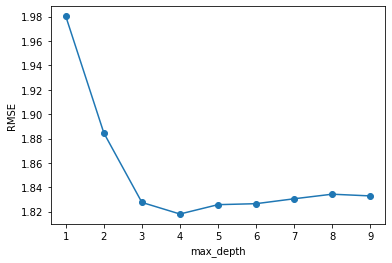

In [132]:
train1_rmse =[]
no_max_depth =[]
for x in range (1, 10):
    xgb_model = xgb.XGBRegressor(     eta = 0.002,
                                      max_depth = x,
                                      min_child_weight = 2,
                                      subsample = 0.8,
                                      gamma = 1,
                                      colsample_bytree = 0.7,
                                      eval_metric = 'mae',
                                      seed = 42,
                                      n_estimators = 3000)
    xgb_model.fit(X_train, y_train)
    xgb_pred_log = xgb_model.predict(X_test)
    xgb_rmse_log= mean_squared_error(y_test, xgb_pred_log, squared=False)
    train1_rmse .append(xgb_rmse_log)
    no_max_depth.append(x)

plt.plot(no_max_depth, train1_rmse, '-o', label='Numeber of Estimators')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

In [133]:
train1_rmse

[1.9803108158507914,
 1.8845984506512707,
 1.8275863828917562,
 1.8180584424737944,
 1.8257294860253594,
 1.826535407659495,
 1.8305600435119687,
 1.8343206815567483,
 1.8329136818332343]

Since the rmse is the lowest when max_depth is 4, so we use max_depth = 4

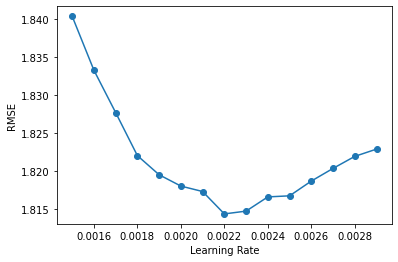

In [134]:
train2_rmse =[]
learning_rate =[]
for x in range (15, 30):
    xgb_model = xgb.XGBRegressor(     eta = x/10000,
                                      max_depth = 4,
                                      min_child_weight = 2,
                                      subsample = 0.8,
                                      gamma = 1,
                                      colsample_bytree = 0.7,
                                      eval_metric = 'mae',
                                      seed = 42,
                                      n_estimators = 3000)
    xgb_model.fit(X_train, y_train)
    xgb_pred_log = xgb_model.predict(X_test)
    xgb_rmse_log= mean_squared_error(y_test, xgb_pred_log, squared=False)
    train2_rmse .append(xgb_rmse_log)
    learning_rate.append(x/10000)

plt.plot(learning_rate, train2_rmse, '-o', label='Numeber of Estimators')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.show()

In [135]:
train2_rmse

[1.8403399081044873,
 1.8332593726258777,
 1.8277024497727539,
 1.8220519644938642,
 1.819541776047451,
 1.8180584424737944,
 1.8173436515849624,
 1.8144040507446326,
 1.8147717770954723,
 1.8166368950861123,
 1.816776706828309,
 1.818713297024184,
 1.8203761329332808,
 1.8219546329613658,
 1.8229076938792004]

Since the rmse is the lowest when eta is 0.0022, so we use eta = 0.0022

In [136]:
# Final
xgb_model = xgb.XGBRegressor(         eta = 0.0022,
                                      max_depth = 4,
                                      min_child_weight = 2,
                                      subsample = 0.8,
                                      gamma = 1,
                                      colsample_bytree = 0.7,
                                      eval_metric = 'mae',
                                      seed = 42,
                                      n_estimators = 3000)
xgb_model.fit(X_train, y_train)
xgb_pred_log = xgb_model.predict(X_test)
xgb_rmse_log= mean_squared_error(y_test, xgb_pred_log, squared=False)
xgb_rmse_log

1.8144040507446326

In [137]:
feat_imp = xgb_model.feature_importances_
num = np.argsort(feat_imp )[::-1]

print("Feature importances ranking:")

for f in range(14):
    print("%d. %s (%f)" % (f + 1, X_train.columns[num[f]], feat_imp[num[f]]))

Feature importances ranking:
1. log_budget (0.213898)
2. GoodProductionCompany (0.185936)
3. log_popularity (0.120172)
4. tagline (0.060292)
5. belongs_to_collection (0.060177)
6. GoodCast (0.056296)
7. release_year (0.042719)
8. runtime (0.042177)
9. main_production_countries (0.039215)
10. main_genre_label (0.033470)
11. GoodCrew (0.032220)
12. main_Keywords (0.031613)
13. original_language (0.027966)
14. release_month (0.027265)


## Generate the result
The result for XGBoost (eXtreme Gradient Boosting) on log_revenue and log_budget is the best among all the modeling, since the r2 score is the highest and the root mean squared error is the lowest. Therefore, we adopt this model to generate our final result.

### 1st Experiment Submission

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_normal,y_normal,test_size=0.2,random_state=1)

In [139]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
rfr_pred = rfr_model.predict(df_test)

In [140]:
final_result1 = rfr_pred
rfr_pred

array([1.05125397e+07, 8.69828834e+06, 4.74377328e+07, ...,
       6.27752505e+07, 1.36370073e+08, 1.89639750e+07])

In [142]:
df_test_tmp = pd.read_csv('test.csv')
df_result1 = pd.DataFrame()
df_result1['id'] = df_test_tmp['id']
df_result1['revenue'] = final_result1
df_result1

,id,revenue
0,3001,1.051254e+07
1,3002,8.698288e+06
2,3003,4.743773e+07
3,3004,2.124276e+07
4,3005,1.027926e+07
...,...,...
4393,7394,1.291255e+08
4394,7395,4.557622e+07
4395,7396,6.277525e+07
4396,7397,1.363701e+08


In [143]:
# Create Submission csv
df_result1[['id','revenue']].to_csv('submission_exp1.csv',index=False)

### 2nd Experiment Submission

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_log,y_log,test_size=0.2,random_state=1)

In [145]:
# Use the xgboost model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
rfr_pred_log_final = rfr_model.predict(df_test_log)

In [146]:
rfr_pred_log_final

array([14.23979446, 11.35690621, 17.10587941, ..., 17.51285955,
       15.68944012, 14.39720636])

In [147]:
# Result undergo inversely Log Transformation (Exponential Function) 
final_result2 = np.expm1(rfr_pred_log_final)
final_result2

array([ 1528494.4819342 ,    85553.27144494, 26852765.64156808, ...,
       40340219.12820224,  6513841.73616071,  1789068.7662805 ])

In [148]:
# Submission
df_result2 = pd.DataFrame()
df_result2['id'] = df_test_tmp['id']
df_result2['revenue'] = final_result2
df_result2

,id,revenue
0,3001,1.528494e+06
1,3002,8.555327e+04
2,3003,2.685277e+07
3,3004,5.229287e+06
4,3005,3.394744e+05
...,...,...
4393,7394,6.662815e+07
4394,7395,3.330410e+07
4395,7396,4.034022e+07
4396,7397,6.513842e+06


In [149]:
# Create Submission csv
df_result2[['id','revenue']].to_csv('submission_exp2.csv',index=False)

### 3rd Experiment Submission

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_log,y_log,test_size=0.2,random_state=1)

In [151]:
# Use the xgboost model
xgb_model = xgb.XGBRegressor(     eta = 0.003,
                                  max_depth = 7,
                                  min_child_weight = 2,
                                  subsample = 0.8,
                                  gamma = 1,
                                  colsample_bytree = 0.7,
                                  eval_metric = 'mae',
                                  seed = 42,
                                  n_estimators = 3000)
xgb_model.fit(X_train, y_train)
xgb_pred_log_final = xgb_model.predict(df_test_log)

In [152]:
xgb_pred_log_final

array([14.533025, 10.914857, 16.39283 , ..., 17.60763 , 16.008158,
       13.381864], dtype=float32)

In [153]:
# Result undergo inversely Log Transformation (Exponential Function) 
final_result3 = np.expm1(xgb_pred_log_final)
final_result3

array([ 2049331.8  ,    54986.266, 13161807.   , ..., 44350290.   ,
        8958896.   ,   648140.06 ], dtype=float32)

In [154]:
# Submission
df_result3 = pd.DataFrame()
df_result3['id'] = df_test_tmp['id']
df_result3['revenue'] = final_result3
df_result3

,id,revenue
0,3001,2.049332e+06
1,3002,5.498627e+04
2,3003,1.316181e+07
3,3004,7.857625e+06
4,3005,3.532492e+05
...,...,...
4393,7394,4.177400e+07
4394,7395,4.451827e+07
4395,7396,4.435029e+07
4396,7397,8.958896e+06


In [155]:
# Create Submission csv
df_result3[['id','revenue']].to_csv('submission_exp3.csv',index=False)

### 4th Experiment Submission

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_log,y_log,test_size=0.2,random_state=1)

In [157]:
xgb_model = xgb.XGBRegressor(         eta = 0.0022,
                                      max_depth = 4,
                                      min_child_weight = 2,
                                      subsample = 0.8,
                                      gamma = 1,
                                      colsample_bytree = 0.7,
                                      eval_metric = 'mae',
                                      seed = 42,
                                      n_estimators = 3000)
xgb_model.fit(X_train, y_train)
xgb_pred_log_final = xgb_model.predict(df_test_log)

In [158]:
xgb_pred_log_final

array([14.628215, 11.896264, 16.38143 , ..., 17.12898 , 15.769351,
       13.512194], dtype=float32)

In [159]:
# Result undergo inversely Log Transformation (Exponential Function) 
final_result4 = np.expm1(xgb_pred_log_final)
final_result4

array([ 2253994.2 ,   146716.47, 13012612.  , ..., 27480320.  ,
        7055732.  ,   738364.06], dtype=float32)

In [160]:
# Submission
df_result4 = pd.DataFrame()
df_result4['id'] = df_test_tmp['id']
df_result4['revenue'] = final_result4
df_result4

,id,revenue
0,3001,2.253994e+06
1,3002,1.467165e+05
2,3003,1.301261e+07
3,3004,7.166447e+06
4,3005,6.710544e+05
...,...,...
4393,7394,4.559164e+07
4394,7395,4.681314e+07
4395,7396,2.748032e+07
4396,7397,7.055732e+06


In [161]:
# Create Submission csv
df_result4[['id','revenue']].to_csv('submission_exp4.csv',index=False)